In [2]:
import numpy as np
import pandas as pd

In [8]:
import pyaf.TS.Signal_Transformation as transf


In [9]:
%matplotlib inline

In [4]:
series = pd.Series(range(1, 12))

In [5]:
def tr1(x):
    if(x >= 0):
        return np.log(1 + x);
    return -np.log(1 - x);

In [25]:
df = pd.DataFrame()
N = 1000
df['t'] = range(N)
df['gauss'] = np.random.randn(N)
df['sig'] = np.exp(np.random.randn(N))
df['tr_sig'] = df['sig'].apply(tr1);

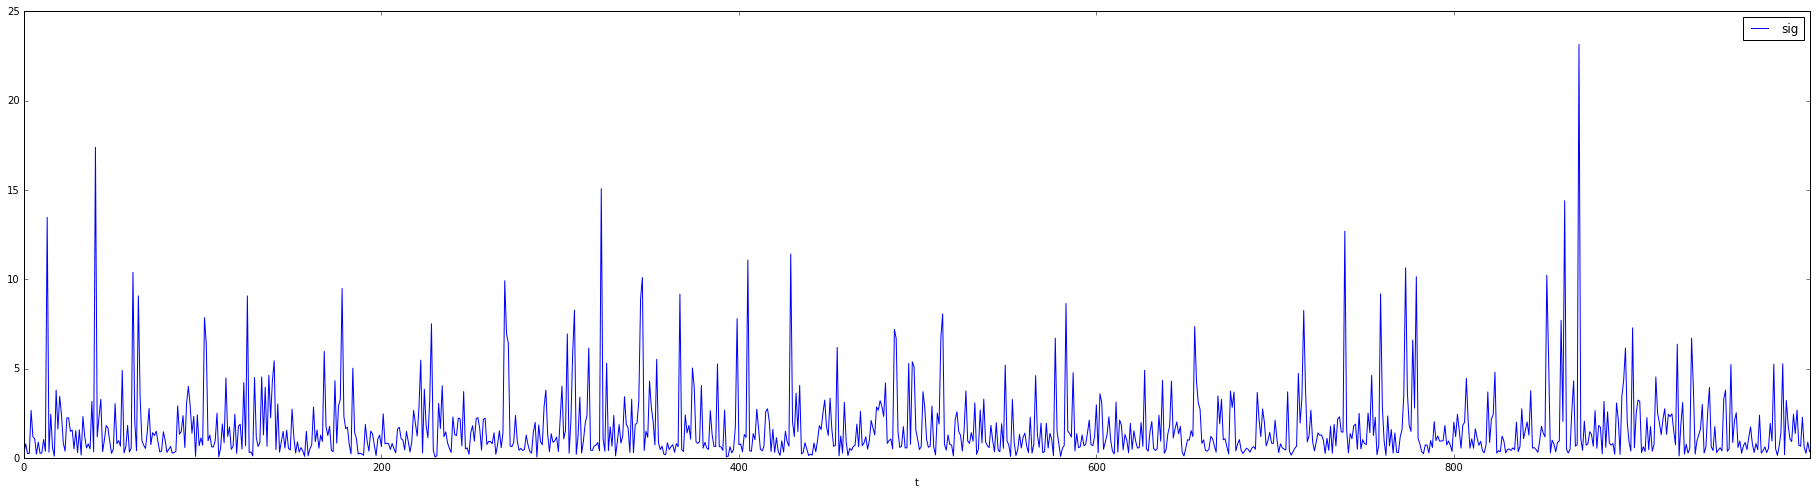

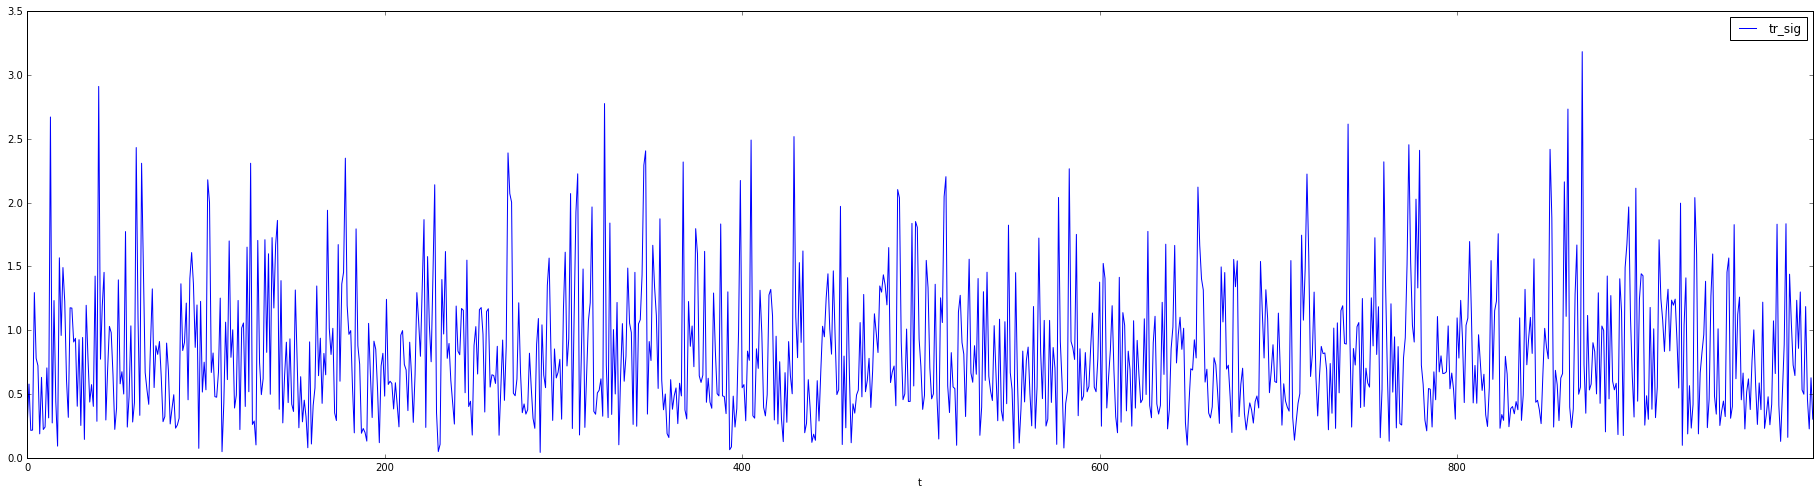

In [26]:
df.plot('t', ['sig'], figsize=(32,8))
df.plot('t', ['tr_sig'], figsize=(32,8))


In [18]:
df.describe()

,t,sig,tr_sig
count,1000.000000,1000.000000,1000.000000
mean,499.500000,0.002432,0.001554
std,288.819436,0.980191,0.609313
min,0.000000,-3.815105,-1.571758
25%,249.750000,-0.658135,-0.505691
50%,499.500000,0.032317,0.031805
75%,749.250000,0.658149,0.505702
max,999.000000,3.632328,1.533059


In [12]:
transf.cSignalTransform_Differencing().apply(series)

0     NaN
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
dtype: float64

In [13]:
tr1 = transf.cSignalTransform_RelativeDifferencing();
tr1.fit(series)
s1 = tr1.apply(series)
s2 = tr1.invert(s1)
print(s1.head())
print(s2.head())


0    0.000000
1    1.000000
2    0.500000
3    0.333333
4    0.250000
dtype: float64
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64


In [14]:
s2 - series

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

In [15]:
    def invert2(df):
        r = df;
        df_orig = 0.0 * df;
        df_orig.iloc[0] = (tr1.mFirstValue - tr1.mMinValue) / tr1.mDelta

        for i in range(1,df.shape[0]):
            previous_value = df_orig.iloc[i - 1] 
            df_orig.iloc[i] = previous_value + r.iloc[i]  * (previous_value + 1)

        df_orig = df_orig * tr1.mDelta + tr1.mMinValue;
        
        return df_orig;

In [16]:
s3 = invert2(s1)

AttributeError: 'cSignalTransform_RelativeDifferencing' object has no attribute 'mMinValue'

In [17]:
s3

NameError: name 's3' is not defined

In [18]:



def invert3(df):
    r = df;
    df_orig = 0.0 * df;
    df_orig.iloc[0] = (tr1.mFirstValue - tr1.mMinValue) / tr1.mDelta

    for i in range(1,df.shape[0]):
        previous_value = df_orig.iloc[i - 1] 
        df_orig.iloc[i] = previous_value + r.iloc[i]  * (previous_value + 1)

    df_orig = df_orig * tr1.mDelta + tr1.mMinValue;
        
    return df_orig;

In [19]:
invert3(s1)

AttributeError: 'cSignalTransform_RelativeDifferencing' object has no attribute 'mMinValue'